In [1]:
import os, sys, copy, re, shutil, traceback, time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import ONIOM_Kits as okt
import ML_for_protein as mlp
from scipy.spatial import distance

In [ ]:
df = pd.read_csv("./molData/AminoAcidData.csv", index_col=0)

In [ ]:
dist = {}

for r in df["ResName"].unique():
    d = {}
    for p, g in df.loc[df["ResName"]==r,["PDBName", "GmxName"]].values:
        d[p]=g
        
    dist[r]=d

In [ ]:
dist

In [ ]:
model = okt.ONIOM_compound(f"../../Desktop/6mwq_A_CutAld.pdb")

In [ ]:
with open("../../Desktop/Seq_6mwq_A_CutAld.txt", "w") as w:
    for n, res in model.GetSequence(mode=["ResID","ResName"]):
        w.write(model.P.AMINO3to1[res])
    

In [ ]:
model = okt.ONIOM_compound(f"../../Desktop/basement.pdb")
model.molDATA["ResID"] -= 24
model.Reset_ID()

for i, res in enumerate("MNHKVHHHHHHIEGRHN"):
    model.Set_Mutation([["A",i+1,model.P.AMINO1to3[res]],])
    
model.Cut_Structure({"AtomType":"H"})
model.Write_PDB("head.pdb", f"../../Desktop")

In [ ]:
model = okt.ONIOM_compound(f"../../Desktop/head_mod.pdb")
model.molDATA.loc[:,["x","y","z"]] -= 20
model.Write_PDB("head_mod2.pdb", f"../../Desktop")

In [ ]:
model = okt.ONIOM_compound(f"../../Desktop/basement2.pdb")
model.molDATA["ResID"] += 159
model.Reset_ID()

for i, res in enumerate("LPETGGGGG"):
    model.Set_Mutation([["A",i+184,model.P.AMINO1to3[res]],])
    
model.Cut_Structure({"AtomType":"H"})
model.molDATA.loc[:,["x","y","z"]] -= 20
model.Write_PDB("tail.pdb", f"../../Desktop")

In [ ]:
model = okt.ONIOM_compound(f"../../Desktop/6mwq_A_CutAld.pdb")
model.molDATA["ResID"] -= 6
model.Write_PDB("6mwq_A_CutAld_str.pdb", f"../../Desktop")

In [ ]:
model = okt.ONIOM_compound(f"../../Desktop/tail.pdb")
model.molDATA["ResID"] -= 6
model.molDATA.loc[:,["x","y","z"]] -= 20
model.Write_PDB("tail_mod.pdb", f"../../Desktop")

In [ ]:
model = okt.ONIOM_compound(f"../../Desktop/6mwq_A_CutAld_str.pdb")
model.Add_ligand(f"../../Desktop/tail_mod.pdb")
model.Add_ligand(f"../../Desktop/head_mod2.pdb")
model.Write_PDB("6mwq_A_DARPin.pdb", f"../../Desktop")

In [ ]:
model = okt.ONIOM_compound(f"../../Desktop/6mwq_A_DARPin_mod.pdb")
model.molDATA.loc[model.molDATA["ResID"]>18, "ResID"] -= 1
model.Write_PDB("6mwq_A_DARPin_mod2.pdb", f"../../Desktop")

In [ ]:
model = okt.ONIOM_compound(f"../../Desktop/6mwq_A_DARPin_mod2_H.pdb")

model.Set_Mutation([["A",76,"ASN"],])

model.Cut_Structure({"AtomType":"H"})
model.Write_PDB("6mwq_A_DARPin_C76N.pdb", f"../../Desktop")

In [ ]:
model = okt.ONIOM_compound(f"../../Desktop/leq6oy6pcf.pqr")
model.Write_PDB("6mwq_A_DARPin_C76N_ProPKA.pdb", f"../../Desktop")

In [ ]:
fn = "Ac_SiP"
model = okt.ONIOM_compound(f"../../Desktop/{fn}.gjf")
model.molDATA.loc[:,["ResName","ChainID","ResID"]] = ["SIP", "B", 201]
model.Reset_PDBname("SIP")

model.Write_PDB(f"{fn}_A","../../Desktop")

In [ ]:
model = okt.ONIOM_compound("../../Desktop/6mwq_A_DARPin_C76N_ProPKA.pdb")
model.Add_ligand(f"../../Desktop/Ac_SiP_A.pdb")
model.Write_PDB("6mwq_A_DARPin_C76N_ProPKA_SiP.pdb", f"../../Desktop")

In [ ]:
model = okt.ONIOM_compound(f"../../Desktop/6mwq_A_DARPin_C76N_ProPKA_SiP_mod.pdb")

model.Set_Mutation([["A",152,"CYS"],])

model.Write_PDB("6mwq_A_DARPin_C76N_F152C_SiP.pdb", f"../../Desktop")

In [ ]:
model = okt.ONIOM_compound(f"../../Desktop/6mwq_A_DARPin_C76N_F152C.pdb")
model.Reset_Resname()
model.Write_PDB("6mwq_A_DARPin_C76N_F152C_mod.pdb", f"../../Desktop")

In [ ]:
model = okt.ONIOM_compound(f"../../Desktop/k27ko9pkz7.pqr")
model.Write_PDB("6mwq_G_ProPKA.pdb", f"../../Desktop")

In [ ]:
model = okt.ONIOM_compound("../../Desktop/6mwq_A_DARPin_C76N_ProPKA_mod.pdb")
model.Reset_Resname()
model.Set_Mutation([["A",152,"CYS"],])
model.Write_PDB("6mwq_A_DARPin_C76N_F152C.pdb", f"../../Desktop", forGromacs=True)

model2 = okt.ONIOM_compound("../../Desktop/6mwq_G_ProPKA.pdb")
model2.Reset_Resname()
model.Add_ligand(model2.molDATA)
model.Write_PDB("6mwq_AG_DARPin_C76N_F152C.pdb", f"../../Desktop", forGromacs=True)

In [ ]:
model = okt.ONIOM_compound("../../Desktop/6mwq_A_DARPin_C76N_ProPKA_mod.pdb")
model.Reset_Resname()
model.Set_Mutation([["A",151,"CYS"],])
model.Write_PDB("6mwq_A_DARPin_C76N_K151C.pdb", f"../../Desktop", forGromacs=True)

model2 = okt.ONIOM_compound("../../Desktop/6mwq_G_ProPKA.pdb")
model2.Reset_Resname()
model.Add_ligand(model2.molDATA)
model.Write_PDB("6mwq_AG_DARPin_C76N_K151C.pdb", f"../../Desktop", forGromacs=True)

In [ ]:
model = okt.ONIOM_compound("../../Desktop/6mwq_A_DARPin_C76N_ProPKA_mod.pdb")
model.Reset_Resname()
model.Set_Mutation([["A",153,"CYS"],])
model.Write_PDB("6mwq_A_DARPin_C76N_G153C.pdb", f"../../Desktop", forGromacs=True)

model2 = okt.ONIOM_compound("../../Desktop/6mwq_G_ProPKA.pdb")
model2.Reset_Resname()
model.Add_ligand(model2.molDATA)
model.Write_PDB("6mwq_AG_DARPin_C76N_G153C.pdb", f"../../Desktop", forGromacs=True)

In [ ]:
str_dir = "str_A153"

strNum = []
distance = []
for n_file in os.listdir(f"../../Desktop/{str_dir}"):
    if not n_file.lower().endswith('.pdb'):
        continue
        
    print(n_file)    
    name, ext = os.path.splitext(n_file)
    model = okt.ONIOM_compound(f"../../Desktop/{str_dir}/{n_file}")
    if not "_AG" in str_dir:
        model.molDATA["ChainID"] = "A"
    
    strNum.append(name[4:])
    distance.append(model.GetDistance_PDB(["A",185, "CA"], ["A",int(str_dir[-3:]), "SG"]))


Df = pd.DataFrame({
    "ID":strNum,
    "Distance":distance
}).astype({"ID":int, "Distance":float})


with open(f"../../Desktop/8_calc_average.sh","w") as w:
    w.write("#!/bin/sh\n\n")
    
    for i in range(1,31):
        try:
            Df_pick = Df[(i-0.5<Df["Distance"])&(Df["Distance"]<=i+0.5)].sort_values("Distance", ascending=False)

            mx = Df_pick.iloc[0]["ID"]
            mn = Df_pick.iloc[-1]["ID"]

            cm1 = f"echo 1 | gmx rmsf -s pull.tpr -f pull_noJump.xtc"
            cm2 = f" -b {mx:.0f} -e {mn:.0f} -o average/rmsf_{i}.xvg -ox average/Average_{i}.pdb -res\n"
            w.write(cm1+cm2)
        except:
            pass

In [ ]:
str_dir = "../../Desktop/str_AG153"
step_size = 3

strNum = []
distance = []
for fi, n_file in enumerate(os.listdir(f"{str_dir}")):
    if not n_file.lower().endswith('.pdb'):
        continue
     
    if fi%100==0 and fi>0:
        print(f"{fi} files are processed.")    
    name, ext = os.path.splitext(n_file)
    model = okt.ONIOM_compound(f"{str_dir}/{n_file}")
    if not "_AG" in str_dir:
        model.molDATA["ChainID"] = "A"
    
    strNum.append(name[4:])
    distance.append(model.GetDistance_PDB(["A",185, "C7"], ["A",int(str_dir[-3:]), "SG"]))


Df = pd.DataFrame({
    "ID":strNum,
    "Distance":distance
}).astype({"ID":int, "Distance":float})
Df.to_excel(f"{str_dir}/distance.xlsx")


with open(f"{str_dir}/10_extract_window.sh","w") as w:
    w.write("#!/bin/sh\n\n")
    w.write("mkdir window\n")
    
    cms11_1 = ""
    cms11_2 = ""
    cms12_1 = ""
    cms12_2 = ""
    
    start_A = 0
    for i in range(1,51):
        try:
            if start_A > 0 and not start_A%step_size == i%step_size:
                continue
            Df["Search"] = abs(Df["Distance"] - i)
            Df_pick = Df[Df["Search"] < 0.5].sort_values("Search", ascending=True)

            tm = Df_pick.iloc[0]["ID"]

            w.write(f"echo 0 | gmx trjconv -s pull.tpr -f pull.xtc -b {tm:.0f} -e {tm:.0f} -o window/conf{tm:.0f}_{i}A.gro\n")
            cms11_1 += f"gmx grompp -f npt_umbrella.mdp -c conf{tm:.0f}_{i}A.gro -p topol.top -r conf{tm:.0f}_{i}A.gro -n index.ndx -o npt_{i}A.tpr -maxwarn 1\n"
            cms11_2 += f"bsub -n 1 \"gmx_mpi mdrun -deffnm npt_{i}A\"\n"
            cms12_1 += f"gmx grompp -f md_umbrella.mdp -c npt_{i}A.gro -t npt_{i}A.cpt -p topol.top -r npt_{i}A.gro -n index.ndx -o umbrella_{i}A.tpr -maxwarn 1\n"
            cms12_2 += f"bsub -n 1 \"gmx_mpi mdrun -deffnm umbrella_{i}A\"\n"
            if start_A == 0:
                start_A = i
        except:
            pass
    
        
with open(f"{str_dir}/11_window_npt.sh","w") as w11:
    w11.write("#!/bin/sh\n\n")
    w11.write(cms11_1)
    w11.write(cms11_2)
    
with open(f"{str_dir}/12_window_sampling.sh","w") as w12:
    w12.write("#!/bin/sh\n\n")
    w12.write(cms12_1)
    w12.write(cms12_2)
    
print(f"Done.")    

In [ ]:
lig = okt.ONIOM_compound(f"../../Desktop/Nakadate/qmmm/Ac_SiP_charge_mod.pdb")
lig.molDATA["ChainID"] = "A"
lig.molDATA["ResID"] = 201

for mut in ["A151","AG151","A152","AG152","A153","AG153"]:
    for num, kind in [(10, "close"),(25, "open")]:
        model = okt.ONIOM_compound(f"../../Desktop/Nakadate/qmmm/{mut}_Average_{num}.pqr")
        if not "AG" in mut:
            model.molDATA["ChainID"] = "A"
            
        model.Add_ligand(lig.molDATA)        
        model.Write_PDB(f"6mwq_{mut[:-3]}_DARPin_{mut[-3:]}C_{kind}.pdb", f"../../Desktop/Nakadate/qmmm")

In [ ]:
for form in ["close","open"]:
    for ch in ["AG"]:
        for mut in ["151C","152C","153C"]:
            print(f"\n-------------6mwq_{ch}_DARPin_{mut}_{form}-------------\n")
            model = okt.ONIOM_compound(f"../../Desktop/Nakadate/qmmm/6mwq_{ch}_DARPin_{mut}_{form}.gjf")
            
            model.Set_Parameters(["./molData/AminoAcidData.csv", f"./molData/231201_Nakadate/molData_SiP_Nakadate.csv"])
            
            SiP_bound = {"SIP":[]}
            if form == "open":
                info = [[("A", 185,"C"),("A",201,"N3"), 1.],]
            else:
                info = [[("A", 185,"C"),("A",201,"N3"), 1.],[("A", int(mut[:-1]),"SG"),("A",201,"C7"), 1.],]

            model.makeConnection(add_info=SiP_bound, add_info_extra=info)

            model.DataInsert({"ResID":185}, "layer", "L")
            for pdbn in ["N3","C20","C21","H25","H26","H27","H28","H29"]:
                model.DataInsert({"ResID":201, "PDBName":pdbn}, "layer", "L")
            for rn in [int(mut[:-1])]:
                model.DataInsert({"ChainID":"A", "ResID":rn}, "layer", "H")
                for pdbn in model.P.MAIN_CHAIN_ATOMS:
                    model.DataInsert({"ChainID":"A", "ResID":rn, "PDBName":pdbn}, "layer", "L")
                    
            model.AtomFreeze_byDistance(area=10.0)

            model.makeDammy(uff=True)
            model.makeCondition({"procN":1, "mem":4000, "mem_scal":"MB", "C_S":model.ChargeSum(G_format=True), "chk":"",
                "Route":"#p opt oniom(b3lyp/6-31g(d,p):uff) geom=connectivity"})
            print(f"{model.ChargeSum()}")

            model.Write_GaussianInput_ONIOM(f"6mwq_{ch}_DARPin_ONIOM_{mut}_{form}", file_path=f"../../Desktop/Nakadate/qmmm/calc_file")

In [ ]:
model = okt.ONIOM_compound(f"../../Desktop/6mwq_A_DARPin_ONIOM_153C_open.gjf")
model.Check_collision()

In [ ]:
dir_n = "../../Desktop/Nakadate/231207"

for f_n in os.listdir(dir_n):
    if ".log" in f_n:
        print(f"\n-------------{f_n}-------------\n")
        fn = f_n.replace('.log','')
        
        model = okt.ONIOM_compound(f"{dir_n}/{fn}.log")

        SiP_bound = {"SIP":[]}
        if "open" in fn:
            info = [[("A", 185,"C"),("A",201,"N3"), 1.],]
        else:
            rn = int(fn.split("_")[-2][:-1])
            info = [[("A", 185,"C"),("A",201,"N3"), 1.],[("A", rn,"SG"),("A",201,"C7"), 1.],]

        model.makeConnection(add_info=SiP_bound, add_info_extra=info)

        """model.DataInsert({"ResID":185}, "layer", "L")
        for pdbn in ["N3","C20","C21","H25","H26","H27","H28","H29"]:
            model.DataInsert({"ResID":201, "PDBName":pdbn}, "layer", "L")
        for rn in [int(mut[:-1])]:
            model.DataInsert({"ChainID":"A", "ResID":rn}, "layer", "H")
            for pdbn in model.P.MAIN_CHAIN_ATOMS:
                model.DataInsert({"ChainID":"A", "ResID":rn, "PDBName":pdbn}, "layer", "L")

        model.AtomFreeze_byDistance(area=10.0)"""

        model.makeDammy(uff=True)
        model.makeCondition({"procN":1, "mem":4000, "mem_scal":"MB", "chk":"",
            "Route":"#p opt oniom(b3lyp/6-31g(d,p):uff) geom=connectivity"})

        model.Write_GaussianInput_ONIOM(f"{fn}_231207", file_path=dir_n)

In [ ]:
dir_n = "../../Desktop/Nakadate/231222"
fn =  "6mwq_AG_DARPin_ONIOM_153C_open_231220"

model = okt.ONIOM_compound(f"{dir_n}/{fn}.log")
model.Renew_Structure(index=120,ONIOM=True)

SiP_bound = {"SIP":[]}
if "open" in fn:
    info = [[("A", 185,"C"),("A",201,"N3"), 1.],]
else:
    rn = int(fn.split("_")[-3][:-1])
    info = [[("A", 185,"C"),("A",201,"N3"), 1.],[("A", rn,"SG"),("A",201,"C7"), 1.],]

model.makeConnection(add_info=SiP_bound, add_info_extra=info)


model.makeDammy(uff=True)
model.makeCondition({"procN":4, "mem":10000, "mem_scal":"MB", "chk":"",
    "Route":"#p opt=calcfc oniom(b3lyp/6-31g(d,p):uff) geom=connectivity"})

model.Write_GaussianInput_ONIOM(f"{fn[:-7]}_231222", file_path=f"{dir_n}/")

In [ ]:
dir_n = "../../Desktop/Nakadate/240105"
for f_n in os.listdir(dir_n):
    if not ".log" in f_n:
        continue
    fn = f_n.replace(".log","")
    
    model = okt.ONIOM_compound(f"{dir_n}/{fn}.log")
    model.Renew_Structure(index=np.argmin(model.Contents["enePath"]),ONIOM=True)

    SiP_bound = {"SIP":[]}
    if "open" in fn:
        info = [[("A", 185,"C"),("A",201,"N3"), 1.],]
    else:
        rn = int(fn.split("_")[-3][:-1])
        info = [[("A", 185,"C"),("A",201,"N3"), 1.],[("A", rn,"SG"),("A",201,"C7"), 1.],]

    model.makeConnection(add_info=SiP_bound, add_info_extra=info)


    model.makeDammy(uff=True)
    model.makeCondition({"procN":4, "mem":10000, "mem_scal":"MB", "chk":"",
        "Route":"#p opt=calcall oniom(b3lyp/6-31g(d,p):uff) geom=connectivity"})

    model.Write_GaussianInput_ONIOM(f"{fn}_re", file_path=f"{dir_n}/")

## Retry Calc

In [ ]:
dn = "../../Desktop/Nakadate"

for form in ["close","open"]:
    for ch in ["A","AG"]:
        for mut in [151,152,153]:
            print(f"\n-------------6mwq_{ch}_DARPin_{mut}_{form}-------------\n")
            model = okt.ONIOM_compound(f"{dn}/ProPKA/{ch}_{mut}_{form}.pdb")
            
            temp = okt.ONIOM_compound(f"{dn}/SIP/{ch}_{mut}_{form}_SIP_Full.pdb")
            model.Add_ligand(temp)
            temp = okt.ONIOM_compound(f"{dn}/H2O.pdb")
            temp.molDATA.loc[:,["x","y","z"]] += 40
            model.Add_ligand(temp)
            
            model.Set_Parameters(["./molData/AminoAcidData.csv", 
                                  f"./molData/240219_Nakadate/molData_SiP_Nakadate_{form}_240219.csv",
                                  "./molData/240219_Nakadate/molData_200_H2O_A.csv" ])
            
            SiP_bound = {"SIP":[]}
            if form == "open":
                info = [[("A",184,"C"),("A",185,"N1"), 1.],]
            else:
                info = [[("A",184,"C"),("A",185,"N1"), 1.],[("A", mut,"SG"),("A",185,"C8"), 1.],]

            model.makeConnection(add_info=SiP_bound, add_info_extra=info)

            model.DataInsert({"ChainID":"A", "ResID":mut}, "layer", "H")
            for pdbn in model.P.MAIN_CHAIN_ATOMS:
                model.DataInsert({"ChainID":"A", "ResID":mut, "PDBName":pdbn}, "layer", "L")
                    
            model.AtomFreeze_byDistance(exclude_res=[("A",185)], area=8.0)

            model.makeDammy(uff=True)
            model.makeCondition({"procN":2, "mem":4000, "mem_scal":"MB", "C_S":model.ChargeSum(G_format=True), "chk":"",
                "Route":"#p opt oniom(b3lyp/6-31g(d,p):uff) geom=connectivity g09defaults"})
            print(f"{model.ChargeSum()}")

            model.Write_GaussianInput_ONIOM(f"ONIOM_DARPin_{ch}_{mut}_{form}", file_path=f"{dn}/calc_file")

In [ ]:
dir_n = "../../Desktop/Nakadate/240304"
fn =  "ONIOM_DARPin_A_153_open_re240301"

mut = int(fn.split("_")[3])

model = okt.ONIOM_compound(f"{dir_n}/{fn}.log")
set_step = np.argmin(model.Contents["enePath"]); print(set_step)
model.Renew_Structure(index=set_step,ONIOM=True)
#model.Renew_Structure(index=120,ONIOM=True)

SiP_bound = {"SIP":[]}
if "open" in fn:
    info = [[("A",184,"C"),("A",185,"N1"), 1.],]
else:
    info = [[("A",184,"C"),("A",185,"N1"), 1.],[("A", mut,"SG"),("A",185,"C8"), 1.],]

model.makeConnection(add_info=SiP_bound, add_info_extra=info)

model.makeDammy(uff=True)
model.makeCondition({"procN":16, "mem":16000, "mem_scal":"MB", "chk":"",
    "Route":"#p opt=calcall oniom(b3lyp/6-31g(d,p):uff) geom=connectivity g09defaults scf=xqc"})

model.Write_GaussianInput_ONIOM(f"{fn}_re", file_path=f"{dir_n}/")

In [3]:
dir_n = "../../Desktop/Nakadate/240329"
for f_n in os.listdir(dir_n):
    if not ".log" in f_n:
        continue
    fn = f_n.replace(".log","")

    mut = int(fn.split("_")[4])
    model = okt.ONIOM_compound(f"{dir_n}/{fn}.log")
    
    """for rn in [49, 112]:
        model.DataInsert({"ChainID":"A","ResID":rn}, "layer", "H")
        for pdbn in model.P.MAIN_CHAIN_ATOMS:
            model.DataInsert({"ChainID":"A","ResID":rn, "PDBName":pdbn}, "layer", "L")"""

    SiP_bound = {"SIP":[]}
    if "open" in fn:
        info = [[("A",184,"C"),("A",185,"N1"), 1.],]
    else:
        info = [[("A",184,"C"),("A",185,"N1"), 1.],[("A", mut,"SG"),("A",185,"C8"), 1.],]

    model.makeConnection(add_info=SiP_bound, add_info_extra=info)

    model.makeDammy(uff=True)
    model.makeCondition({"procN":3, "mem":12000, "mem_scal":"MB", "chk":"",
        "Route":"#p oniom(apfd/6-311+g(2d,p):uff)=EmbedCharge geom=connectivity scf=xqc"})

    model.Write_GaussianInput_ONIOM(f"{fn}_SP", file_path=f"{dir_n}/")

## 3rd_calc

In [10]:
types = {"id":int,"AtomID":int,"AtomType":str,"AmberType":str,"UFFType":str,"charge":float,"PDBName":str,"ResName":str,
         "ResID":int,"ChainID":str,"freeze":int, "x":float, "y":float,"z":float,"layer":str, "info":str}  
clms = ["id","AtomID","AtomType","AmberType","UFFType","charge","PDBName","ResName","ResID","ChainID","freeze", "x", "y","z","layer", "info"]

for form in ["close","open"]:
    for ch in ["A","AG"]:
        for mut in [151,152,153]:
            print(f"\n-------------{ch}_{mut}_{form}-------------\n")
            dir_n = f"../../Desktop/Nakadate/3rd_calc/MD_source/{ch}{mut}{form}"

            model = okt.ONIOM_compound(f"{dir_n}/{ch}{mut}{form}_model.pdb")
            model.Cut_Structure({"ResName":"SOL"})
            if ch == "A":
                model.molDATA["ChainID"] = "A"
            model_pos1 = model.GetFragmentPos({"ResName":"SIP"})
            model_pos2 = model.GetFragmentPos({"ResName":"CYS", "ResID":mut})
            model_pos = np.concatenate([model_pos1, model_pos2])
            
            SOL_dat_ALL = []
            with open(f"{dir_n}/{ch}{mut}{form}_model.pdb","r") as r:
                SOL_id = 1
                SOL_pos = []
                SOL_dat = []
                for l in r:
                    ln = l.strip().split()
                    if not ln[0] == "ATOM":
                        continue
                            
                    if ln[3] == "SOL":
                        SOL_pos.append(ln[5:8])
                        if ln[2] == "OW":
                            SOL_dat.append([0, 0, "O", "", "", 0, "OW", "SOL", SOL_id, "C", 0, ln[5], ln[6], ln[7], "L", ""])
                        elif ln[2] == "HW1":
                            SOL_dat.append([0, 0, "H", "", "", 0, "HW1", "SOL", SOL_id, "C", 0, ln[5], ln[6], ln[7], "L", ""])
                        elif ln[2] == "HW2":
                            SOL_dat.append([0, 0, "H", "", "", 0, "HW2", "SOL", SOL_id, "C", 0, ln[5], ln[6], ln[7], "L", ""])
                            dmat = distance.cdist(model_pos, np.array(SOL_pos, dtype=float), metric='euclidean') 
                            if dmat.min() < 15.:          
                                SOL_dat_ALL += SOL_dat
                                SOL_id += 1
                            SOL_pos = []
                            SOL_dat = []
                            
            molDATA_sol = pd.DataFrame(SOL_dat_ALL, columns=clms).astype(types)
            model.Add_ligand(molDATA_sol)
            
            try:
                temp = okt.ONIOM_compound(f"{dir_n}/{ch}_{mut}_cl1_{form}.pdb")
            except:
                temp = okt.ONIOM_compound(f"{dir_n}/{ch}_{mut}_cl2_{form}.pdb")

            mol = model.molDATA.query("ResID > 0 and ResID < 185")
            mol_t = temp.molDATA.query("ResID > 0 and ResID < 185")

            model.move_MinimizedRMSD_byFragment(mol, mol_t, ths=0.0001, mainChainOnly=True, log=False)
            print("done")
            model.Write_PDB(f"{ch}{mut}{form}_model_moved.pdb", dir_n)
            


-------------A_151_close-------------

done

-------------A_152_close-------------

done

-------------A_153_close-------------

done

-------------AG_151_close-------------

done

-------------AG_152_close-------------

done

-------------AG_153_close-------------

done

-------------A_151_open-------------

done

-------------A_152_open-------------

done

-------------A_153_open-------------

done

-------------AG_151_open-------------

done

-------------AG_152_open-------------

done

-------------AG_153_open-------------

done


In [ ]:
mut = "AG"
pos = 151
ring = "close"
cluster = 1

dir_n = f"../../Desktop/Nakadate/3rd_calc/MD_source/{mut}{pos}{ring}"

model = okt.ONIOM_compound(f"{dir_n}/{mut}{pos}{ring}_model.pdb")

In [13]:
dn = "../../Desktop/Nakadate/3rd_calc"

for form in ["close","open"]:
    for ch in ["A","AG"]:
        for mut in [151,152,153]:
            print(f"\n-------------6mwq_{ch}_DARPin_{mut}_{form}-------------\n")
            model = okt.ONIOM_compound(f"{dn}/prev_ini/ONIOM_DARPin_{ch}_{mut}_{form}.gjf")
            temp = okt.ONIOM_compound(f"{dn}/MD_source/{ch}{mut}{form}/{ch}{mut}{form}_model_moved.pdb")
            temp.Cut_Structure({"ChainID":"C"}, extract=True)
     
            model.Add_ligand(temp)
            model.Set_Parameters([f"./molData/240219_Nakadate/molData_SOL.csv",])
            
            SiP_bound = {"SIP":[]}
            if form == "open":
                info = [[("A",184,"C"),("A",185,"N1"), 1.],]
            else:
                info = [[("A",184,"C"),("A",185,"N1"), 1.],[("A", mut,"SG"),("A",185,"C8"), 1.],]

            model.makeConnection(add_info=SiP_bound, add_info_extra=info)

            model.DataInsert({"ChainID":"A", "ResID":mut}, "layer", "H")
            for pdbn in model.P.MAIN_CHAIN_ATOMS:
                model.DataInsert({"ChainID":"A", "ResID":mut, "PDBName":pdbn}, "layer", "L")
                    
            model.AtomFreeze_byDistance(area=8.0)
            #model.DataInsert({"ChainID":"C"}, "freeze", -1)

            model.makeDammy(uff=True)
            model.makeCondition({"procN":2, "mem":4000, "mem_scal":"MB", "chk":"",
                "Route":"#p opt oniom(b3lyp/6-31g(d,p):uff) geom=connectivity"})

            model.Write_GaussianInput_ONIOM(f"ONIOM_DARPin_withWater_{ch}_{mut}_{form}", file_path=f"{dn}/calc_file")
            


-------------6mwq_A_DARPin_151_close-------------

<<<<<<<<<<Setting UFFType>>>>>>>>>>>>>>
... using the data from ./molData/240219_Nakadate/molData_SOL.csv
All UFFType data complemented.
<<<<<<<<<<Setting charge>>>>>>>>>>>>>>
... using the data from ./molData/240219_Nakadate/molData_SOL.csv
All charge data complemented.
<<<<<<<<<<Setting freeze>>>>>>>>>>>>>>
... using the data from ./molData/240219_Nakadate/molData_SOL.csv
All freeze data complemented.
<<<<<<<<<<Setting layer>>>>>>>>>>>>>>
... using the data from ./molData/240219_Nakadate/molData_SOL.csv
All layer data complemented.

-------------6mwq_A_DARPin_152_close-------------

<<<<<<<<<<Setting UFFType>>>>>>>>>>>>>>
... using the data from ./molData/240219_Nakadate/molData_SOL.csv
All UFFType data complemented.
<<<<<<<<<<Setting charge>>>>>>>>>>>>>>
... using the data from ./molData/240219_Nakadate/molData_SOL.csv
All charge data complemented.
<<<<<<<<<<Setting freeze>>>>>>>>>>>>>>
... using the data from ./molData/240219_Naka

In [3]:
dn = "../../Desktop/Nakadate/3rd_calc/calc_file_2"

for form in ["close","open"]:
    for ch in ["A","AG"]:
        for mut in [151,152,153]:
            print(f"\n-------------6mwq_{ch}_DARPin_{mut}_{form}-------------\n")
            model = okt.ONIOM_compound(f"{dn}/ONIOM_DARPin_withWater_{ch}_{mut}_{form}.gjf")
            
            
            model.DataInsert({"ChainID":"C","PDBName":"OW"}, "freeze", -1)

            #model.makeDammy(uff=True)
            model.makeCondition({"procN":3, "mem":6000, "mem_scal":"MB", "chk":"",
                "Route":"#p opt oniom(b3lyp/6-31g(d,p):uff) geom=connectivity"})

            model.Write_GaussianInput_ONIOM(f"ONIOM_DARPin_withWater_{ch}_{mut}_{form}", file_path=f"{dn}/")
            


-------------6mwq_A_DARPin_151_close-------------


-------------6mwq_A_DARPin_152_close-------------


-------------6mwq_A_DARPin_153_close-------------


-------------6mwq_AG_DARPin_151_close-------------


-------------6mwq_AG_DARPin_152_close-------------


-------------6mwq_AG_DARPin_153_close-------------


-------------6mwq_A_DARPin_151_open-------------


-------------6mwq_A_DARPin_152_open-------------


-------------6mwq_A_DARPin_153_open-------------


-------------6mwq_AG_DARPin_151_open-------------


-------------6mwq_AG_DARPin_152_open-------------


-------------6mwq_AG_DARPin_153_open-------------



In [3]:
dir_n = "../../Desktop/Nakadate/240319"
fn =  "ONIOM_DARPin_withWater_A_152_close_re3_tight"

mut = int(fn.split("_")[4])

model = okt.ONIOM_compound(f"{dir_n}/{fn}.gjf")

SiP_bound = {"SIP":[]}
if "open" in fn:
    info = [[("A",184,"C"),("A",185,"N1"), 1.],]
else:
    info = [[("A",184,"C"),("A",185,"N1"), 1.],[("A", mut,"SG"),("A",185,"C8"), 1.],]
    
model.DataInsert({"layer":"L"}, "freeze", -1)

model.makeConnection(add_info=SiP_bound, add_info_extra=info)

model.makeDammy(uff=True)
model.makeCondition({"procN":4, "mem":10000, "mem_scal":"MB", "chk":"",
    "Route":"#p opt=calcfc oniom(b3lyp/6-31g(d,p):uff) geom=connectivity scf=xqc"})

model.Write_GaussianInput_ONIOM(f"{fn}", file_path=f"{dir_n}/")

1

In [6]:
types = {"id":int,"AtomID":int,"AtomType":str,"AmberType":str,"UFFType":str,"charge":float,"PDBName":str,"ResName":str,
         "ResID":int,"ChainID":str,"freeze":int, "x":float, "y":float,"z":float,"layer":str, "info":str}  
clms = ["id","AtomID","AtomType","AmberType","UFFType","charge","PDBName","ResName","ResID","ChainID","freeze", "x", "y","z","layer", "info"]


dir_n = "../../Desktop/Nakadate/SP"
for f_n in os.listdir(dir_n):
    if not ".log" in f_n:
        continue
    
    fn = f_n.replace(".log","")
    pro = fn.split("_")[2]
    mut = int(fn.split("_")[3])
    form = fn.split("_")[4]
    
    if os.path.exists(f"{dir_n}/calc/ONIOM_DARPin_{pro}_{mut}_{form}_wat_SP.gjf"):
        print(f"SKIPPED: {fn}")
        continue
    
    model = okt.ONIOM_compound(f"{dir_n}/{fn}.log")
    print(fn)
    dir_n_2 = f"../../Desktop/Nakadate/3rd_calc/MD_source/{pro}{mut}{form}"
    temp = okt.ONIOM_compound(f"{dir_n_2}/{pro}{mut}{form}_model.pdb")
    print(f"SOURCE: {pro}{mut}{form}_model.pdb")
    
    mol = model.molDATA.query("ResID > 0 and ResID < 185")
    mol_t = temp.molDATA.query("ResID > 0 and ResID < 185")
    model.move_MinimizedRMSD_byFragment(mol, mol_t, ths=0.0001, mainChainOnly=True, log=False)
   
    model_pos1 = model.GetFragmentPos({"ResName":"SIP"})
    model_pos2 = model.GetFragmentPos({"ResName":"CYS", "ResID":mut})
    model_pos = np.concatenate([model_pos1, model_pos2])
    
    SOL_dat_ALL = []
    with open(f"{dir_n_2}/{pro}{mut}{form}_model.pdb","r") as r:
        SOL_id = 1
        SOL_pos = []
        SOL_dat = []
        for l in r:
            ln = l.strip().split()
            if not ln[0] == "ATOM":
                continue

            if ln[3] == "SOL":
                SOL_pos.append(ln[5:8])
                if ln[2] == "OW":
                    SOL_dat.append([0, 0, "O", "", "", 0, "OW", "SOL", SOL_id, "C", 0, ln[5], ln[6], ln[7], "L", ""])
                elif ln[2] == "HW1":
                    SOL_dat.append([0, 0, "H", "", "", 0, "HW1", "SOL", SOL_id, "C", 0, ln[5], ln[6], ln[7], "L", ""])
                elif ln[2] == "HW2":
                    SOL_dat.append([0, 0, "H", "", "", 0, "HW2", "SOL", SOL_id, "C", 0, ln[5], ln[6], ln[7], "L", ""])
                    dmat = distance.cdist(model_pos, np.array(SOL_pos, dtype=float), metric='euclidean')
                    if dmat.min() < 15. and dmat.min() > 2.:          
                        SOL_dat_ALL += SOL_dat
                        SOL_id += 1
                    SOL_pos = []
                    SOL_dat = []

    molDATA_sol = pd.DataFrame(SOL_dat_ALL, columns=clms).astype(types)
    model.Add_ligand(molDATA_sol)
    model.Set_Parameters([f"./molData/240219_Nakadate/molData_SOL.csv",])
    
    SiP_bound = {"SIP":[]}
    if "open" in fn:
        info = [[("A",184,"C"),("A",185,"N1"), 1.],]
    else:
        info = [[("A",184,"C"),("A",185,"N1"), 1.],[("A", mut,"SG"),("A",185,"C8"), 1.],]

    model.makeConnection(add_info=SiP_bound, add_info_extra=info)

    model.makeDammy(uff=True)
    model.makeCondition({"procN":3, "mem":12000, "mem_scal":"MB", "chk":"",
        "Route":"#p oniom(apfd/6-311+g(2d,p):uff)=EmbedCharge geom=connectivity scf=xqc"})

    model.Write_GaussianInput_ONIOM(f"ONIOM_DARPin_{pro}_{mut}_{form}_wat_SP_APFD", file_path=f"{dir_n}/calc")
    print(f"Output: ONIOM_DARPin_{pro}_{mut}_{form}_wat_SP_APFD")
    

SKIPPED: ONIOM_DARPin_AG_151_close_re240227_SP
ONIOM_DARPin_AG_151_open_re240301_SP
SOURCE: AG151open_model.pdb
<<<<<<<<<<Setting UFFType>>>>>>>>>>>>>>
... using the data from ./molData/240219_Nakadate/molData_SOL.csv
All UFFType data complemented.
<<<<<<<<<<Setting charge>>>>>>>>>>>>>>
... using the data from ./molData/240219_Nakadate/molData_SOL.csv
All charge data complemented.
<<<<<<<<<<Setting freeze>>>>>>>>>>>>>>
... using the data from ./molData/240219_Nakadate/molData_SOL.csv
All freeze data complemented.
<<<<<<<<<<Setting layer>>>>>>>>>>>>>>
... using the data from ./molData/240219_Nakadate/molData_SOL.csv
All layer data complemented.
CAUTION: These atoms are too close: ['A', 200, 'O2'] ['C', 168, 'OW']
CAUTION: These atoms are too close: ['A', 182, 'HA2'] ['C', 381, 'HW1']
Output: ONIOM_DARPin_AG_151_open_wat_SP_APFD
ONIOM_DARPin_AG_152_close_re_SP
SOURCE: AG152close_model.pdb
<<<<<<<<<<Setting UFFType>>>>>>>>>>>>>>
... using the data from ./molData/240219_Nakadate/molData_SO

In [2]:
dir_n = "../../Desktop/Nakadate/240326"
fn =  "ONIOM_DARPin_withWater_A_152_close_re8"

mut = int(fn.split("_")[4])

model = okt.ONIOM_compound(f"{dir_n}/{fn}.log")
#set_step = np.argmin(model.Contents["enePath"]); print(set_step)
#model.Renew_Structure(index=set_step,ONIOM=True)
#model.Renew_Structure(index=5,ONIOM=True)

SiP_bound = {"SIP":[]}
if "open" in fn:
    info = [[("A",184,"C"),("A",185,"N1"), 1.],]
else:
    info = [[("A",184,"C"),("A",185,"N1"), 1.],[("A", mut,"SG"),("A",185,"C8"), 1.],]

model.makeConnection(add_info=SiP_bound, add_info_extra=info)

model.makeDammy(uff=True)
model.makeCondition({"procN":4, "mem":10000, "mem_scal":"MB", "chk":"",
    "Route":"#p opt=calcfc oniom(b3lyp/6-31g(d,p):uff) geom=connectivity scf=xqc"})

model.Write_GaussianInput_ONIOM(f"{fn}_re", file_path=f"{dir_n}/")

1

### Analysis

In [19]:
dir_n = "../../Desktop/Nakadate/SP3"

count_res = []
for f_n in os.listdir(dir_n):
    if ".pdb" in f_n:
        print(f"=================={f_n}=====================")
        model = okt.ONIOM_compound(f"{dir_n}/{f_n}")
        
        mol = model.molDATA
        mol_pos = model.GetStructurePos()
        sip_pos = model.GetFragmentPos({"ResName":"SIP"})
        
        filt = ~(mol["ResName"]=="SOL")
        filt = filt & (np.min(distance.cdist(mol_pos, sip_pos), axis=1) < 8.)
        shell = mol.loc[filt]
        
        printed = []
        for nm, ri, ci in shell.loc[:,["ResName","ResID","ChainID"]].values:
            res = f"{ci}_{ri}{nm}"
            if not res in printed:
                printed.append(res)
                count_res.append(res)
                print(res)

==================ONIOM_DARPin_withWater_AG_151_close_re3_re_SP.pdb=====================
A_86TRP
A_87GLY
A_92HIS
A_114ASN
A_115ALA
A_116LEU
A_117ASP
A_118LEU
A_119ILE
A_120GLY
A_121LYS
A_122THR
A_147ASN
A_148ALA
A_149GLN
A_150ASP
A_151CYS
A_152PHE
A_153GLY
A_154LYS
A_155THR
A_158ASP
A_183GLY
A_184GLY
A_185SIP
A_200HOH
B_138GLU
B_139TYR
B_140ASN
B_141TYR
B_144HIS
B_200GLN
B_202ALA
B_203LEU
B_204SER
B_217LEU
==================ONIOM_DARPin_withWater_AG_151_open_re2_SP.pdb=====================
A_173GLN
A_174LYS
A_175LEU
A_176ASN
A_177LEU
A_178PRO
A_179GLU
A_181GLY
A_182GLY
A_183GLY
A_184GLY
A_185SIP
==================ONIOM_DARPin_withWater_AG_152_close_re3_SP.pdb=====================
A_119ILE
A_121LYS
A_147ASN
A_149GLN
A_150ASP
A_151LYS
A_152CYS
A_153GLY
A_154LYS
A_155THR
A_156ALA
A_157PHE
A_158ASP
A_159ILE
A_161ILE
A_173GLN
A_176ASN
A_178PRO
A_179GLU
A_180THR
A_181GLY
A_182GLY
A_183GLY
A_184GLY
A_185SIP
A_200HOH
B_65GLN
B_141TYR
B_142ASN
B_143SER
B_144HIS
B_145ASN
B_146VAL
B_147TYR
B_162L

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
        85, 86]),
 [Text(0, 0, 'A_114ASN'),
  Text(1, 0, 'A_115ALA'),
  Text(2, 0, 'A_116LEU'),
  Text(3, 0, 'A_117ASP'),
  Text(4, 0, 'A_118LEU'),
  Text(5, 0, 'A_119ILE'),
  Text(6, 0, 'A_120GLY'),
  Text(7, 0, 'A_121LYS'),
  Text(8, 0, 'A_122THR'),
  Text(9, 0, 'A_125HIS'),
  Text(10, 0, 'A_145ASP'),
  Text(11, 0, 'A_146VAL'),
  Text(12, 0, 'A_147ASN'),
  Text(13, 0, 'A_148ALA'),
  Text(14, 0, 'A_149GLN'),
  Text(15, 0, 'A_150ASP'),
  Text(16, 0, 'A_151CYS'),
  Text(17, 0, 'A_151LYS'),
  Text(18, 0, 'A_152CYS'),
  Text(19, 0, 'A_152PHE'),
  Text(20, 0, 'A_153CYS'),
  Text(21, 0, 'A_153GLY'),
  Text(22, 0, 'A_1

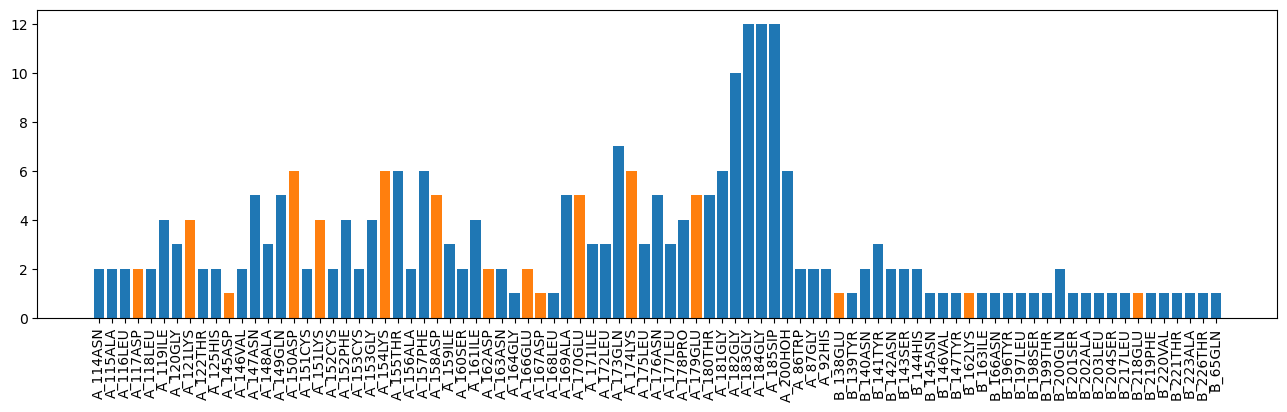

In [37]:
uniq, counts = np.unique(count_res, return_counts=True)
tick = np.arange(len(counts))

u1 = []; u2 = []
counts1 = []; counts2 = []
tk1 = []; tk2 = []
for u, ct, tk in zip(uniq, counts, tick):
    if "LYS" in u or "ASP" in u or "GLU" in u:
        u2.append(u)
        counts2.append(ct)
        tk2.append(tk)
    else:
        u1.append(u)
        counts1.append(ct)
        tk1.append(tk)

fig, ax = plt.subplots(figsize=(16., 4.))
ax.bar(tick, counts, tick_label=uniq)
ax.bar(tk2, counts2)
plt.xticks(rotation=90)
#fig.autofmt_xdate(rotation=90)